# Wrangle and Analyze Data <br>


## Introduction

The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. <br>
Data wrangling consists of: <br>
>1- Gathering data <br>
>2- Assessing data <br>
>3- Cleaning data <br>
>4- Storing, analyzing, and visualizing wrangled data <br><br>



## Gathering Data 

In [668]:
#Importing backages 
import pandas as pd
import numpy as np
import requests
from urllib.request import urlopen , Request
from bs4 import BeautifulSoup
import json
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

1- The WeRateDogs Twitter archive contains tweets with ratings only. 
One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo).

>The WeRateDogs Twitter archive is given as CSV file.

In [669]:
# Reading the WeRateDogs Twitter archive using panda 
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2- The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network.  The table contians: tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921 , p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever,  p1_conf is how confident the algorithm is in its #1 prediction → 95% ,p1_dog is whether or not the #1 prediction is a breed of dog → TRUE, p2 is the algorithm's second most likely prediction → Labrador retriever, p2_conf is how confident the algorithm is in its #2 prediction → 1% , p2_dog is whether or not the #2 prediction is a breed of dog → TRUE, etc. 

> This file (image_predictions.tsv) is hosted on Udacity's.In this section it will be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
   


In [670]:
#using the Requests library and pandas to download the data programmatically and read it
# Specify url
url = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

# Package the request, send the request and catch the response 
request = Request(url)

#reading file 
response = urlopen(request)
df_predict = pd.read_csv(response,sep="\t")
df_predict.to_csv('image_predictions.tsv')
df_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3- Additional Data via the Twitter API. A pandas DataFrame with  tweet ID, retweet count, and favorite count.
> Accessing Project Data Without a Twitter Account using the provied tweet_json.txt that contains resulting data from twitter_api.py.

In [671]:
#creating a path 
tweets_data_path = 'tweet-json.txt'

#empty Initialized list to store tweets
tweets_data = []

#Open file
tweets_file = open(tweets_data_path, "r")

#Read in tweets and store in list
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

#Close connection to file
tweets_file.close()

#Print the keys of the first tweet dict
tweets_data[0].keys()

#creat a dataframe contians (id ,favorite_count ,retweet_count)
df_tweet = pd.DataFrame(tweets_data, columns=['id','favorite_count', 'retweet_count'])
df_tweet.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing data

#### Programmatic assessment

In [672]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [673]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [674]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [675]:
df_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [676]:
sum(df_predict.jpg_url.duplicated())

66

In [677]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [678]:
df_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [679]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [680]:
df_tweet.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


#### Visualization assessment


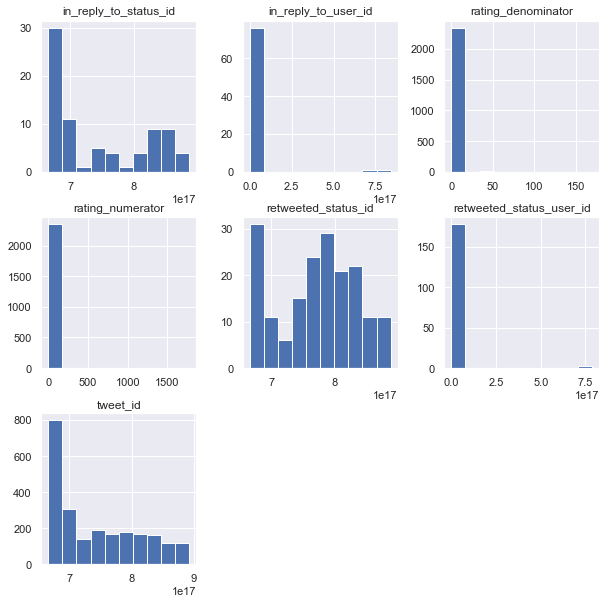

In [681]:
df_archive.hist(figsize=(10, 10));

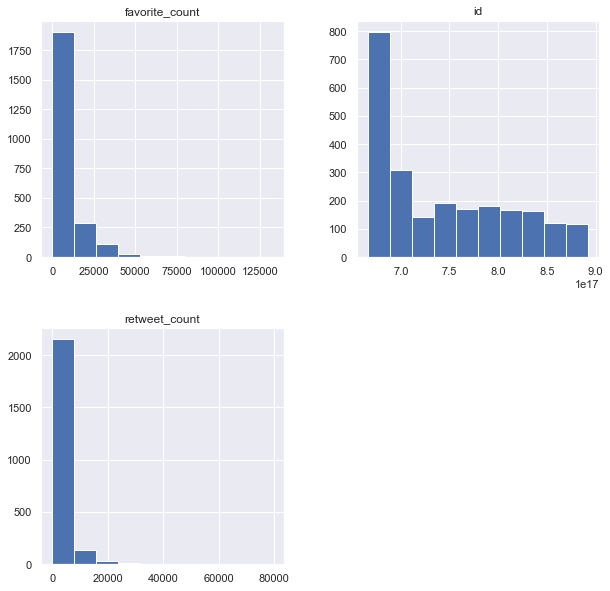

In [682]:
df_tweet.hist(figsize=(10, 10));

#### Quality
##### The `tweet archive` data
- Retweets are included in the data  
- column with NaN values
- Invaild name as a and none
- Expanded_urls missing values
- souce column incorrect format

##### The ` tweet image predictions` data
- 66 duplicated jpg_url.
- p1, p2, and p3 contian capitalized names and the rest are not.
##### The ` tweet ` data
- id column renames to twitter_id
 

#### Tidy
##### The `tweet archive` data
- timestamp should be datetime.
- Four columns for dog type (doggo, floofer, pupper, and puppo) instead of one.
- join the three data sets


## Clean data

### Quality

In [683]:
#Creating copy of each datafram
df_archive_clean = df_archive.copy()
df_predict_clean = df_predict.copy()
df_tweet_clean = df_tweet.copy()

#### `treatments`: Retweets are included in the archive data

#### Define 
Remove retweets using retweeted_status_id. 

#### Code 

In [684]:
#finding retweet 
retweet = df_archive_clean[df_archive_clean['retweeted_status_id'].notnull()].index
#drop retweet 
df_archive_clean.drop(retweet, inplace=True)

#### Test

In [685]:
#test retweet removed 
df_archive_clean[df_archive_clean['retweeted_status_id'].notnull()].count()
                 

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

#### `archive data `: column with NaN values in archive data

##### Define
Remove unnecessary column

##### Code

In [686]:
#drop columns 
df_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1,inplace = True)

####  Test

In [687]:
#test removing columns
df_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### `archive data`: Invaild name as a and none

##### Define
Remove rows that contain invaild names

#### code 

In [688]:
#remove 'None' name 
df_archive_clean = df_archive_clean[df_archive_clean.name != "None"]
#remove 'a' name 
df_archive_clean = df_archive_clean[df_archive_clean.name != "a"]
# remove 'an' 
df_archive_clean = df_archive_clean[df_archive_clean.name != "an"]

#### Test

In [689]:
#test removing "none" names
sum(df_archive_clean.name == "None")

0

In [690]:
#test removing "a" names
sum(df_archive_clean.name == "a" )

0

In [691]:
#test removing "an" names
sum(df_archive_clean.name == "an" )

0

#### `archive data` : Expanded_urls missing values

#### Define 
Remove row with missing values

#### Code

In [692]:
#creat a df for the missing values
Expanded_urls_missing= df_archive_clean[df_archive_clean['expanded_urls'].isnull()].index
#dropping these values 
df_archive_clean.drop(Expanded_urls_missing, inplace=True)


#### Test

In [693]:
df_archive_clean[df_archive_clean['expanded_urls'].isnull()].count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

#### `archive data `: souce column incorrect format

In [694]:
df_archive_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

#### Define
Rename each source to easy to read data

#### Code

In [695]:
#replace each row with readable source
df_archive_clean.source = df_archive_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
df_archive_clean.source = df_archive_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
df_archive_clean.source = df_archive_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_archive_clean.source = df_archive_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [696]:
df_archive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine', 'TweetDeck'],
      dtype=object)

##### The ` tweet image predictions` data : 66 duplicated jpg_url.

#### Define 
Remove the duplicated jpg_url 

#### Code 

In [697]:
#drop duplicate 
df_predict_clean.drop_duplicates(['jpg_url'],inplace=True)

#### Test 

In [698]:
#testing 
sum(df_predict_clean.jpg_url.duplicated())

0

##### The ` tweet image predictions` data: p1, p2, and p3 contian capitalized names and the rest are not.

#### Define 
Using capitalize() method to convert the first character of p1, p2, and p3 to capital

#### Code

In [699]:
#capitalize p1 p2 p3 
df_predict_clean.p1 = df_predict_clean.p1.str.capitalize()
df_predict_clean.p2 = df_predict_clean.p2.str.capitalize()
df_predict_clean.p3 = df_predict_clean.p3.str.capitalize()

#### Test 

In [700]:
#testin 
df_predict_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_turtle,0.933012,False,Mud_turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan_mastiff,0.058279,True,Fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_cart,0.962465,False,Shopping_basket,0.014594,False,Golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_poodle,0.201493,True,Komondor,0.192305,True,Soft-coated_wheaten_terrier,0.082086,True


##### The ` tweet ` data : id column renames to twitter_id

#### Define 
Rename id column to twitter_id 

In [701]:
df_tweet_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [702]:
#print head to test the change
df_tweet_clean.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Tidy 

#### The ` tweet  archive` : timestamp should be datetime.

#### Define 
Convert timestamp datatype to datetime

#### Code

In [703]:
# Convert timestamp datatype to datetime
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)
df_archive_clean['Date'] = pd.to_datetime(df_archive_clean['timestamp'], format='%Y:%M:%D').dt.date
df_archive_clean['Time'] = pd.to_datetime(df_archive_clean['timestamp'], format='%H:%M:%S').dt.time
df_archive_clean.drop(['timestamp'],axis=1,inplace = True)

#### test

In [704]:
#test the change
df_archive_clean.head(10)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Date,Time
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,2017-07-28,16:27:12
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,2017-07-27,16:25:51
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,2017-07-26,15:59:51
10,890006608113172480,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None,2017-07-26,00:31:25
11,889880896479866881,Twitter for iPhone,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None,2017-07-25,16:11:53


#### The ` tweet  archive` : Four columns for dog type (doggo, floofer, pupper, and puppo) instead of one.

#### Define 
combian the four columns for dog type (doggo, floofer, pupper, and puppo) on one.

#### Code 

In [705]:
#remove none from the column
df_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = df_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '')
# combian the four column 
df_archive_clean['dog_stage'] = df_archive_clean['doggo'] + df_archive_clean['floofer'] + df_archive_clean['pupper'] + df_archive_clean['puppo']
#dropping the old column
df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace = True)


#### Test

In [706]:
#testing
df_archive_clean.dog_stage.value_counts()

               1240
pupper          128
doggo            40
puppo            16
floofer           5
doggopupper       5
Name: dog_stage, dtype: int64

In [707]:
# change doggopupper doggofloofer, and doggopuppo to mixed 
df_archive_clean.dog_stage = df_archive_clean.dog_stage.replace('doggopupper', 'mixed')
df_archive_clean.dog_stage = df_archive_clean.dog_stage.replace('doggopuppo', 'mixed')
df_archive_clean.dog_stage = df_archive_clean.dog_stage.replace('doggofloofer', 'mixed')

In [708]:
#testing
df_archive_clean.dog_stage.value_counts()

           1240
pupper      128
doggo        40
puppo        16
mixed         5
floofer       5
Name: dog_stage, dtype: int64

### Storing the data 

#### Join the data : ` tweet  archive`, ` predict data`, and ` tweet  data` on one dataframe

#### Code

In [709]:
# Join the data
twitter_master1 = pd.merge(left=df_archive_clean, right=df_predict, left_on='tweet_id', right_on='tweet_id')
twitter_master = pd.merge(left=twitter_master1, right=df_tweet_clean, left_on='tweet_id', right_on='tweet_id')


#### Test 

In [710]:
twitter_master.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,Date,Time,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,00:18:03,,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,15:58:51,,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,16:00:24,,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


### Storing the data 

In [711]:
#Storing the data 
twitter_master.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data

In [712]:
#dfine a data set and read
df = pd.read_csv("twitter_archive_master.csv")
df.head()

,Unnamed: 0,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,Date,Time,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,00:18:03,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,15:58:51,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,16:00:24,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


In [713]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 24 columns):
Unnamed: 0            1387 non-null int64
tweet_id              1387 non-null int64
source                1387 non-null object
text                  1387 non-null object
expanded_urls         1387 non-null object
rating_numerator      1387 non-null int64
rating_denominator    1387 non-null int64
name                  1387 non-null object
Date                  1387 non-null object
Time                  1387 non-null object
dog_stage             185 non-null object
jpg_url               1387 non-null object
img_num               1387 non-null int64
p1                    1387 non-null object
p1_conf               1387 non-null float64
p1_dog                1387 non-null bool
p2                    1387 non-null object
p2_conf               1387 non-null float64
p2_dog                1387 non-null bool
p3                    1387 non-null object
p3_conf               1387 non-null float

In [714]:
# the shape of df 
df.shape

(1387, 24)

In [715]:
#unique values 
df.nunique()

Unnamed: 0            1387
tweet_id              1387
source                   3
text                  1387
expanded_urls         1387
rating_numerator        19
rating_denominator       5
name                   933
Date                   555
Time                  1363
dog_stage                5
jpg_url               1387
img_num                  4
p1                     296
p1_conf               1384
p1_dog                   2
p2                     308
p2_conf               1384
p2_dog                   2
p3                     311
p3_conf               1387
p3_dog                   2
favorite_count        1317
retweet_count         1204
dtype: int64

#### The percentage of source of tweets

In [716]:
#The percentage of source of tweets
df['source'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Twitter for iPhone    98.1%
Twitter Web Client     1.2%
TweetDeck              0.7%
Name: source, dtype: object

#### The popular Dog 

In [717]:
#Top Three popular dogs
df[['dog_stage','rating_numerator']].groupby(['dog_stage'])['rating_numerator'].count().nlargest(3).reset_index(name='Top 3 ')

,dog_stage,Top 3
0,pupper,122
1,doggo,38
2,puppo,15


#### Top five names 

In [718]:
df.name.value_counts().nlargest(5)

Charlie    11
Oliver     10
Lucy       10
Cooper     10
Tucker      9
Name: name, dtype: int64

#### Accuracy prediction rate for each model.

In [719]:
# Correct rate for the first model
df['p1_dog'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

True     77.0%
False    23.0%
Name: p1_dog, dtype: object

In [720]:
# Correct rate for the second model
df['p2_dog'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

True     78.4%
False    21.6%
Name: p2_dog, dtype: object

In [721]:
# Correct rate for the third model
df['p3_dog'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

True     75.5%
False    24.5%
Name: p3_dog, dtype: object

#### Which dog easily predicted 

In [722]:
#number of dogs in each catagory
pupper =(len(df.query(" dog_stage == 'pupper' and p1_dog == True"))/len(df['dog_stage'] == 'pupper'))*100
doggo =(len(df.query(" dog_stage == 'doggo' and p1_dog == True"))/len(df['dog_stage'] == 'doggo'))*100
puppo =(len(df.query(" dog_stage == 'puppo' and p1_dog == True"))/len(df['dog_stage'] == 'puppo'))*100
mixed = (len(df.query(" dog_stage == 'mixed' and p1_dog == True"))/len(df['dog_stage'] == 'mixed'))*100
floofer = (len (df.query("dog_stage == 'floofer' and p1_dog == True "))/len(df['dog_stage'] == 'floofer'))*100
#list 
dog = [pupper, doggo, puppo, mixed,floofer ] 




<BarContainer object of 5 artists>

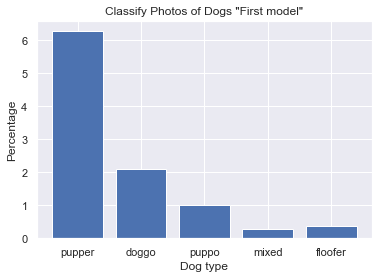

In [723]:
#plot the perecentage of Classify Photos of Dogs "First model"
x = np.arange(len(dog))
fig, axes = plt.subplots(ncols=1, nrows=1)
plt.title('Classify Photos of Dogs "First model"')
plt.xlabel('Dog type')
plt.ylabel('Percentage')
axes.set_xticks(x)
axes.set_xticklabels(['pupper', 'doggo', 'puppo', 'mixed','floofer' ])
plt.bar(names, dog)

#### Density Plot of Retweets by the type of dog

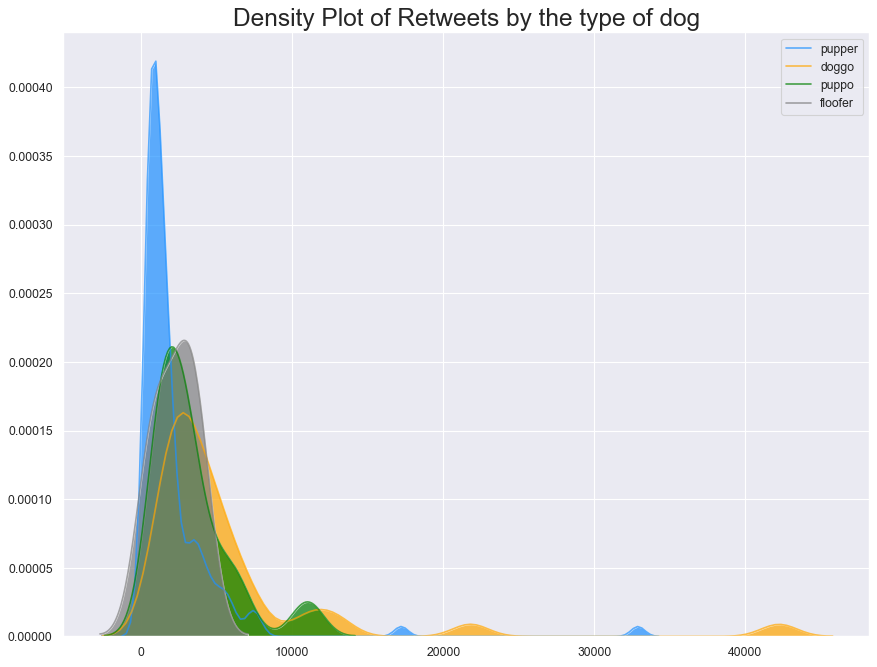

In [724]:

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.kdeplot(df.loc[df['dog_stage'] == 'pupper', "retweet_count"], color="dodgerblue", label="pupper", shade=True,alpha=.7)
sns.kdeplot(df.loc[df['dog_stage'] == 'doggo', "retweet_count"], color="orange", label="doggo", shade=True,alpha=.7)
sns.kdeplot(df.loc[df['dog_stage'] == 'puppo', "retweet_count"], color="green", label="puppo", shade=True,alpha=.7)
#sns.kdeplot(df.loc[df['dog_stage'] == 'mixed', "retweet_count"], color="red", label="mixed", shade=True,alpha=.7)
sns.kdeplot(df.loc[df['dog_stage'] == 'floofer', "retweet_count"], color="grey", label="floofer", shade=True,alpha=.7)


# Decoration
plt.title('Density Plot of Retweets by the type of dog', fontsize=22)
plt.legend()
plt.show()

<br>